In [3]:
#Import library
import pandas as pd

In [4]:
#Load the dataset
df=pd.read_csv('email.csv')

In [5]:
#Inspect the first few rows to understand the data structure
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [19]:
#Seperating spam emails
spam_emails = df[df['Category'] == 'spam']['Message']

In [20]:
#Display the number of spam emails
print(f"Number of spam emails: {len(spam_emails)}")

Number of spam emails: 747


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
specific_words = ['free','now', 'claim','offer','win', 'click','call','price', 'urgent']
vectorizer = CountVectorizer(vocabulary=specific_words)

In [34]:
vectors=vectorizer.fit_transform(spam_emails)

In [35]:
vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 962 stored elements and shape (747, 9)>

In [36]:
bow_spam=pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out() )

In [37]:
bow_spam

,free,now,claim,offer,win,click,call,price,urgent
0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,2,0,0,0,1,0,0
3,2,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
742,0,1,0,0,0,0,0,0,0
743,1,0,0,0,0,0,0,0,0
744,1,0,0,0,0,0,0,0,0
745,1,0,0,0,0,0,1,0,0


In [38]:
word_count=bow_spam.sum(axis=0)

In [39]:
word_count

free      224
now       199
claim     111
offer      27
win        64
click       5
call      352
price      17
urgent     62
dtype: int64

In [40]:
word_count_df=pd.DataFrame(word_count, columns=['counts']).sort_values(by='counts',ascending=False)

In [41]:
word_count_df=word_count_df.head(20)

In [42]:
import matplotlib.pyplot as plt

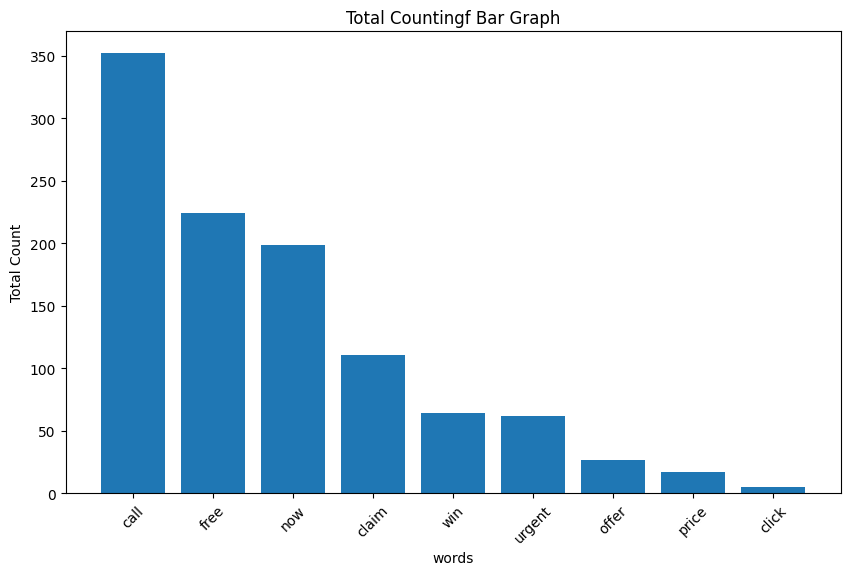

In [43]:
plt.figure(figsize=(10,6))
plt.bar(word_count_df.index,word_count_df['counts'] )
plt.xlabel('words')
plt.ylabel('Total Count')
plt.title('Total Countingf Bar Graph')
plt.xticks(rotation=45)
plt.show()